Zespoły klasyfikatorów
----

In [26]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets


fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


In [51]:
from datasets import read_dataset

X, y, classes = read_dataset('iris', 'species')

In [52]:
# bootstrapping
import numpy as np

N = len(y)
inds = np.array(range(N))
# opis statystyczny dataframe
print('Standard')
print(X.describe())
for i in range(2):
    chosen = np.random.choice(inds, N)
    X_bootstrap = X.iloc[chosen]
    print(f'{i+1} bootstrap')
    print(X_bootstrap.describe())

Standard
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
1 bootstrap
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.909333     3.016000      3.895333     1.225333
std        0.898272     0.391535      1.788754     0.763706
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.525000     0.300000
50%        6.000000     3.000000      4.600000     1.400000
75%        6.575000

Bagging
---

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))

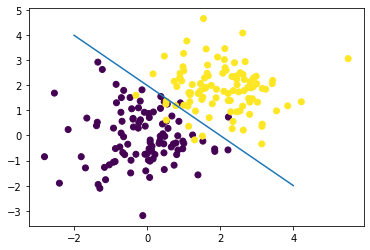

In [6]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from datasets import plot_space

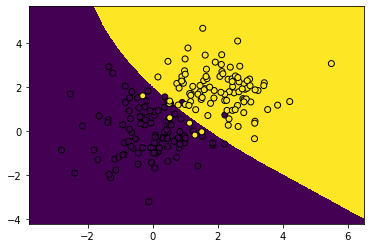

In [55]:
plot_space(BaggingClassifier(base_estimator=GaussianNB()), train_data, train_labels)

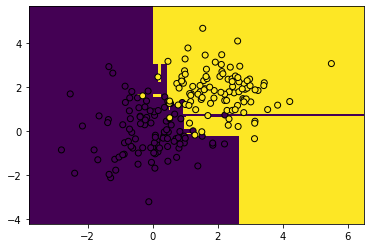

In [56]:
plot_space(BaggingClassifier(base_estimator=DecisionTreeClassifier()), train_data, train_labels)

In [58]:
from sklearn.datasets.samples_generator import make_moons
X, y = make_moons(n_samples=100, noise=0.05)

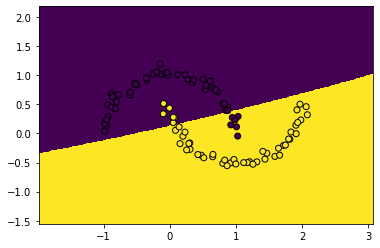

In [59]:
plot_space(BaggingClassifier(base_estimator=GaussianNB()), X, y)

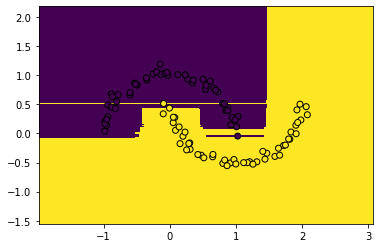

In [60]:
plot_space(BaggingClassifier(base_estimator=DecisionTreeClassifier()), X, y)

## Testy na zbiorach danych

In [62]:
X, y, classes = read_dataset('glass', 'Type', 'ID')
X.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
ID,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [63]:
# możemy uzyskać dostęp do poszczególnych klasyfikatorów
bclf = BaggingClassifier().fit(X, y)
print(bclf.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=456813680, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1993463445, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_d

In [27]:
from datasets import cross_validate, print_results, plot_cm

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Results for BaggingClassifier
----
  Accuracy:  0.6635514018691588
  Precision: 0.6922709235209236
  Recall:    0.6335123807073203
  F1 score:  0.6502575180441582
  Mislabeled 72 out of 214




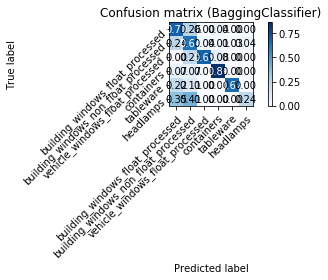

In [28]:
metrics, cm = cross_validate(BaggingClassifier, StratifiedKFold(10), X, y)
print_results(metrics)
plot_cm(cm, classes)

In [29]:
def plot_results(result_df, title, plot_type='bar'):
    ind = np.arange(len(result_df))
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 1 / len(result_df.columns)
    if plot_type == 'bar':
        plot = lambda index, data, label: ax.bar(index, data, width=width, label=label)
    elif plot_type == 'plot':
        plot = lambda index, data, label: ax.plot(index, data, label=label)
    plot(ind, result_df['accuracy'], 'Accuracy')
    plot(ind+width, result_df['precision'], 'Precision')
    plot(ind+2*width, result_df['recall'], 'Recall')
    plot(ind+3*width, result_df['fscore'], 'fscore')
    
    ax.set_title(title)
    ax.set_ylabel('Scores')
    ax.set_xlabel(result_df.index.name)
    ax.set_xticks(ind + 3 * width / 2)
    ax.set_xticklabels(result_df.index)
    ax.autoscale()
    ax.legend()
    return ax

In [30]:
def test_params(X, y, classes, classifier, classifier_param, classifier_const_params=None,
                kfold=None,
                normalizer=None, binning=None):
    if classifier_const_params is None:
        classifier_const_params = {}
    if kfold is None:
        kfold = StratifiedKFold(10)
    X = preprocess_data(X, normalizer)
    X = bin_data(X, binning)
    param = list(classifier_param.keys())[0]
    data = {param: [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for index, value in enumerate(list(classifier_param.values())[0]):
        kwargs = {param: value}
        clf = classifier(**kwargs, **classifier_const_params)
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(clf,
                                     kfold,
                                     X, y, classes,
                                     talk=False)
        data[param].append(value)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index(param)
    return plot_results(df, f'{clf.__class__.__name__} - {param}', plot_type='plot'), df


/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

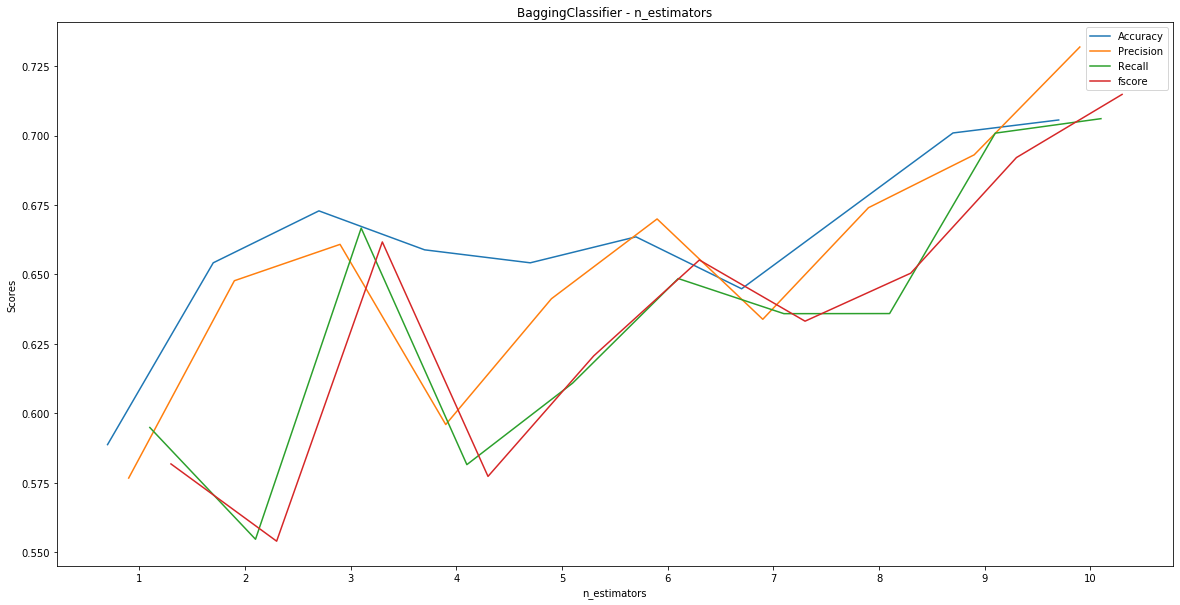

,accuracy,precision,recall,fscore,cm
n_estimators,,,,,
1,0.588785,0.576749,0.594945,0.581832,"[[41, 20, 0, 3, 0, 6], [16, 41, 4, 2, 3, 10], ..."
2,0.654206,0.647758,0.554727,0.554034,"[[60, 7, 0, 1, 0, 2], [24, 42, 10, 0, 0, 0], [..."
3,0.672897,0.660841,0.666701,0.661715,"[[49, 16, 0, 1, 0, 4], [15, 47, 4, 1, 3, 6], [..."
4,0.658879,0.596013,0.581584,0.577348,"[[58, 8, 0, 2, 0, 2], [21, 44, 5, 2, 2, 2], [0..."
5,0.654206,0.641269,0.610888,0.620697,"[[49, 16, 0, 2, 0, 3], [18, 49, 3, 1, 2, 3], [..."
6,0.663551,0.669989,0.648546,0.655223,"[[48, 18, 0, 1, 0, 3], [18, 48, 4, 0, 4, 2], [..."
7,0.644860,0.633883,0.635906,0.633204,"[[49, 16, 0, 3, 0, 2], [19, 43, 5, 1, 2, 6], [..."
8,0.672897,0.674037,0.635942,0.650473,"[[50, 17, 0, 2, 0, 1], [17, 49, 1, 2, 2, 5], [..."
9,0.700935,0.693056,0.700868,0.692074,"[[52, 14, 0, 3, 0, 1], [15, 50, 4, 2, 1, 4], [..."


In [32]:
ax, df = test_params(X, y, classes,
                     BaggingClassifier, {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                     classifier_const_params={'base_estimator': DecisionTreeClassifier()})
plt.show()
df

In [33]:
def test_classifiers(X, y, classes,
                     classifiers,
                     kfold=None,
                     normalizer=None, binning=None):
    if kfold is None:
        kfold = StratifiedKFold(10)
    X = preprocess_data(X, normalizer)
    X = bin_data(X, binning)
    data = {'classifier': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for index, classifier in enumerate(classifiers):
        name =  f"{classifier.__class__.__name__}-{index}"
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(classifier,
                                     kfold,
                                     X, y, classes,
                                     talk=False)
        data['classifier'].append(name)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index('classifier')
    return plot_results(df, 'Classifiers comparison'), df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

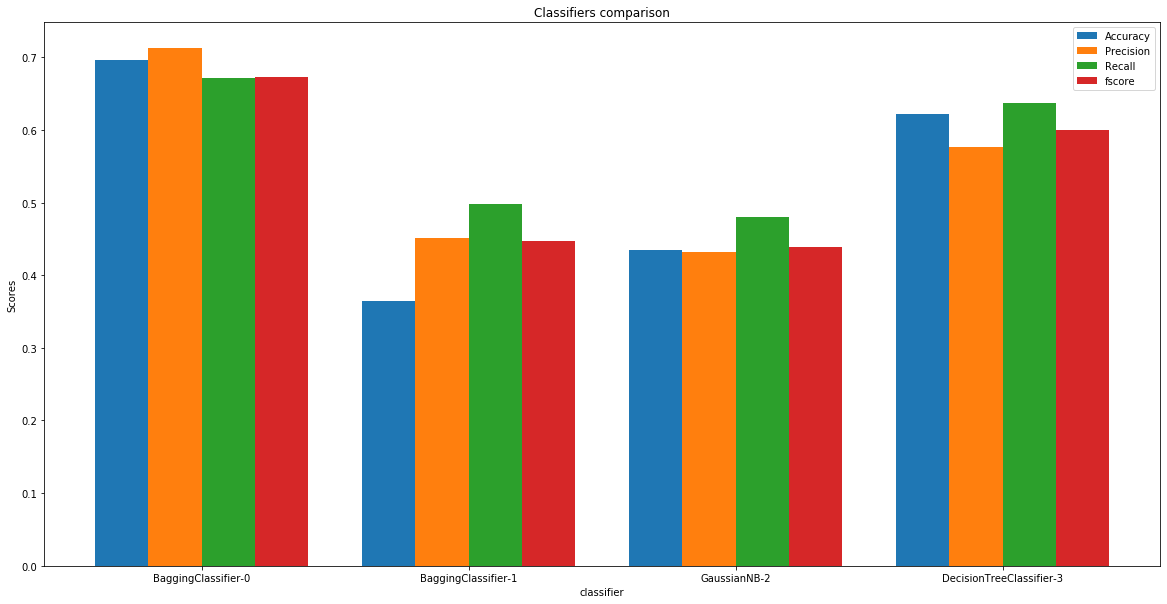

,accuracy,precision,recall,fscore,cm
classifier,,,,,
BaggingClassifier-0,0.696262,0.712527,0.670682,0.672323,"[[52, 14, 0, 3, 0, 1], [17, 51, 4, 1, 2, 1], [..."
BaggingClassifier-1,0.364486,0.451690,0.498385,0.447156,"[[24, 11, 0, 0, 1, 34], [30, 11, 5, 2, 3, 25],..."
GaussianNB-2,0.434579,0.431278,0.480511,0.438462,"[[45, 9, 0, 0, 1, 15], [41, 11, 6, 1, 3, 14], ..."
DecisionTreeClassifier-3,0.621495,0.576320,0.636480,0.599459,"[[41, 16, 0, 2, 2, 9], [15, 45, 5, 2, 5, 4], [..."


In [34]:
ax, df = test_classifiers(X, y, classes,
                          [BaggingClassifier(),
                           BaggingClassifier(GaussianNB()),
                           GaussianNB(),
                           DecisionTreeClassifier()])
plt.show()
df

Random Forest
----

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(train_data, train_labels)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

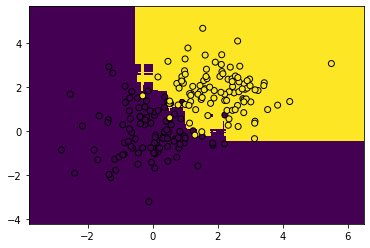

In [36]:
xs, ys = get_grid(train_data)

predicted = clf.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

In [37]:
model = RandomForestClassifier()

model.fit(X, y)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
import matplotlib.pyplot as plt

xs, ys = get_grid(X)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
ax, df = test_params(X, y, classes,
                     RandomForestClassifier, {'max_features': [0.1 * i for i in range(1, 11)]})
plt.show()
df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

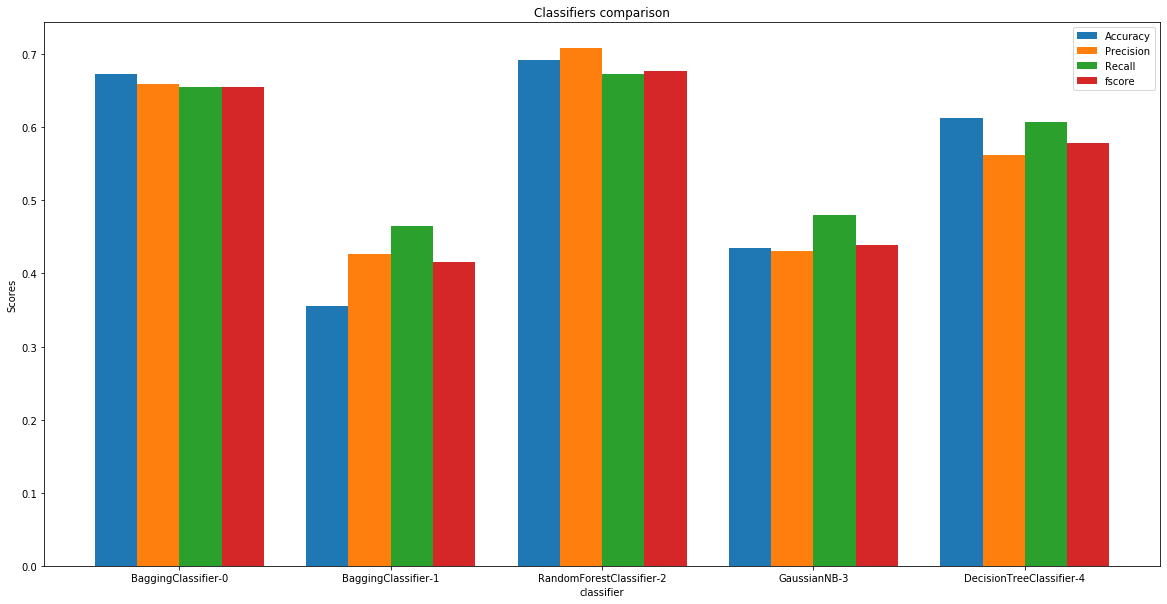

,accuracy,precision,recall,fscore,cm
classifier,,,,,
BaggingClassifier-0,0.672897,0.659633,0.655513,0.654627,"[[53, 13, 0, 1, 0, 3], [20, 45, 5, 0, 2, 4], [..."
BaggingClassifier-1,0.355140,0.426604,0.465482,0.415943,"[[23, 10, 0, 0, 1, 36], [25, 12, 6, 0, 3, 30],..."
RandomForestClassifier-2,0.691589,0.708446,0.672734,0.677442,"[[53, 15, 0, 0, 0, 2], [19, 49, 5, 0, 2, 1], [..."
GaussianNB-3,0.434579,0.431278,0.480511,0.438462,"[[45, 9, 0, 0, 1, 15], [41, 11, 6, 1, 3, 14], ..."
DecisionTreeClassifier-4,0.612150,0.562255,0.606835,0.578775,"[[47, 15, 0, 2, 2, 4], [18, 41, 5, 2, 4, 6], [..."


In [39]:
ax, df = test_classifiers(X, y, classes,
                          [BaggingClassifier(),
                           BaggingClassifier(GaussianNB()),
                           RandomForestClassifier(),
                           GaussianNB(),
                           DecisionTreeClassifier()])
plt.show()
df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

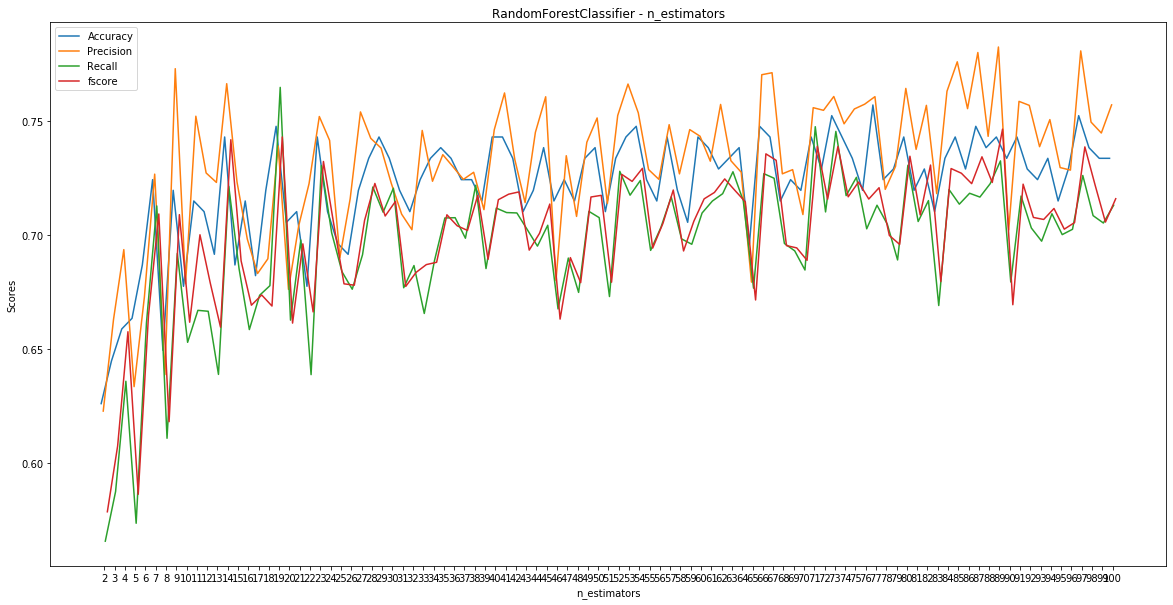

,accuracy,precision,recall,fscore,cm
n_estimators,,,,,
2,0.626168,0.622899,0.565898,0.578782,"[[58, 10, 0, 0, 0, 2], [29, 37, 6, 0, 2, 2], [..."
3,0.644860,0.663074,0.587622,0.607621,"[[47, 19, 0, 0, 0, 4], [19, 51, 4, 0, 1, 1], [..."
4,0.658879,0.693646,0.635966,0.657668,"[[55, 12, 0, 1, 0, 2], [24, 43, 2, 2, 1, 4], [..."
5,0.663551,0.633608,0.573747,0.586443,"[[51, 17, 0, 0, 0, 2], [15, 52, 5, 0, 2, 2], [..."
6,0.686916,0.672893,0.661512,0.664924,"[[54, 15, 0, 1, 0, 0], [16, 46, 2, 1, 4, 7], [..."
...,...,...,...,...,...
96,0.728972,0.728481,0.702547,0.705493,"[[53, 13, 0, 2, 0, 2], [12, 56, 4, 1, 1, 2], [..."
97,0.752336,0.780710,0.726119,0.738649,"[[58, 10, 0, 1, 0, 1], [13, 55, 5, 1, 1, 1], [..."
98,0.738318,0.749524,0.708537,0.721863,"[[56, 10, 0, 2, 0, 2], [13, 55, 5, 0, 1, 2], [..."


In [41]:
ax, df = test_params(X, y, classes,
                     RandomForestClassifier, {'n_estimators': range(2, 101, 1)},
                     classifier_const_params={})
plt.show()
df

Boosting
---

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
clf = AdaBoostClassifier()

clf.fit(train_data, train_labels)

xs, ys = get_grid(train_data)

predicted = clf.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

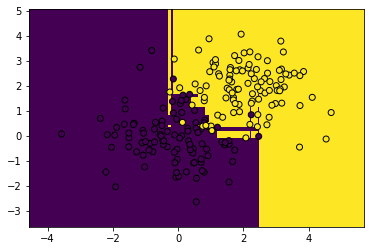

In [36]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

In [69]:
model = AdaBoostClassifier()

model.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

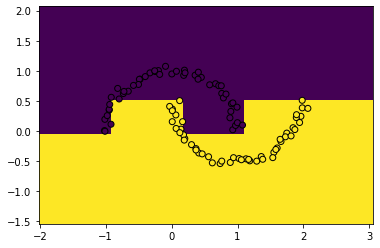

In [70]:
import matplotlib.pyplot as plt

xs, ys = get_grid(X)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.show()

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

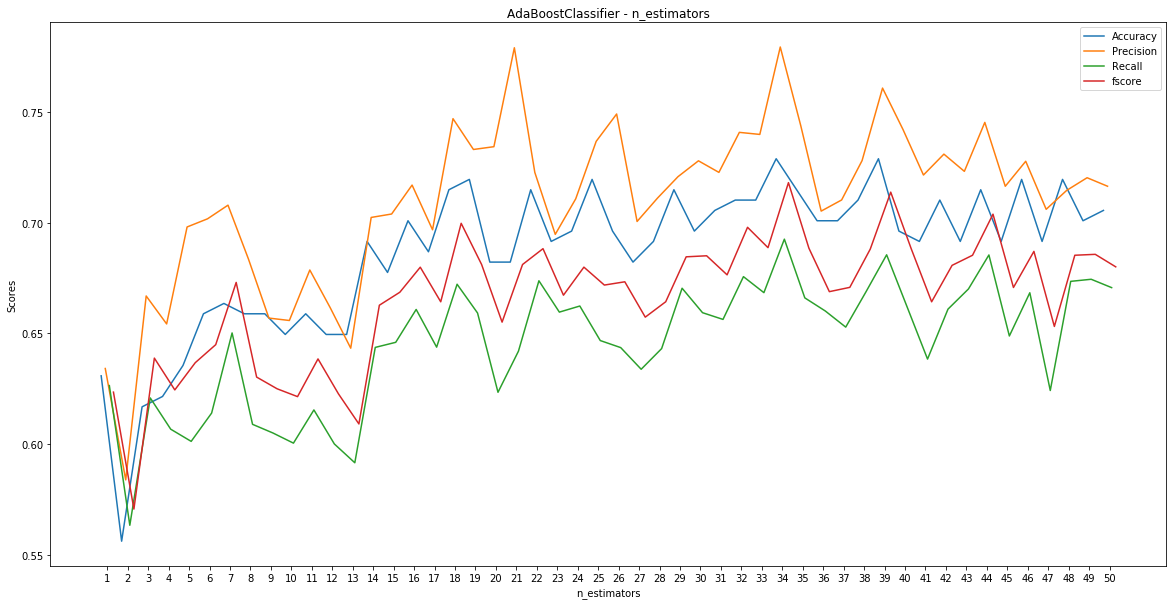

,accuracy,precision,recall,fscore,cm
n_estimators,,,,,
1,0.630841,0.634143,0.626420,0.623461,"[[51, 14, 0, 2, 0, 3], [23, 38, 4, 1, 2, 8], [..."
2,0.556075,0.583782,0.563268,0.570595,"[[41, 21, 0, 1, 0, 7], [29, 35, 4, 0, 2, 6], [..."
3,0.616822,0.666930,0.620835,0.638835,"[[49, 13, 0, 1, 0, 7], [32, 38, 2, 1, 1, 2], [..."
4,0.621495,0.654290,0.606702,0.624463,"[[49, 13, 0, 1, 0, 7], [30, 40, 2, 2, 1, 1], [..."
5,0.635514,0.698120,0.601200,0.636774,"[[50, 14, 0, 1, 0, 5], [29, 43, 1, 2, 1, 0], [..."
6,0.658879,0.701812,0.613994,0.644918,"[[51, 13, 0, 1, 0, 5], [24, 47, 1, 2, 1, 1], [..."
7,0.663551,0.707979,0.650214,0.673059,"[[51, 13, 0, 1, 0, 5], [27, 46, 2, 0, 1, 0], [..."
8,0.658879,0.683629,0.608903,0.630264,"[[53, 13, 0, 1, 0, 3], [25, 47, 3, 0, 1, 0], [..."
9,0.658879,0.656935,0.604973,0.624972,"[[51, 13, 0, 1, 0, 5], [20, 50, 4, 0, 1, 1], [..."


In [50]:
# model = RandomForestClassifier()

# model.fit(X, y)

# import matplotlib.pyplot as plt

# xs, ys = get_grid(X)

# predicted = model.predict(
#     np.column_stack((xs.flatten(),
#                      ys.flatten()))).reshape(xs.shape)

# fig, ax = plt.subplots()
# ax.pcolormesh(xs, ys, predicted)
# ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
ax, df = test_params(X, y, classes,
                     AdaBoostClassifier,
                     {'n_estimators': range(1, 51)},
                     {'base_estimator': DecisionTreeClassifier(max_depth=5)})
plt.show()
df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/

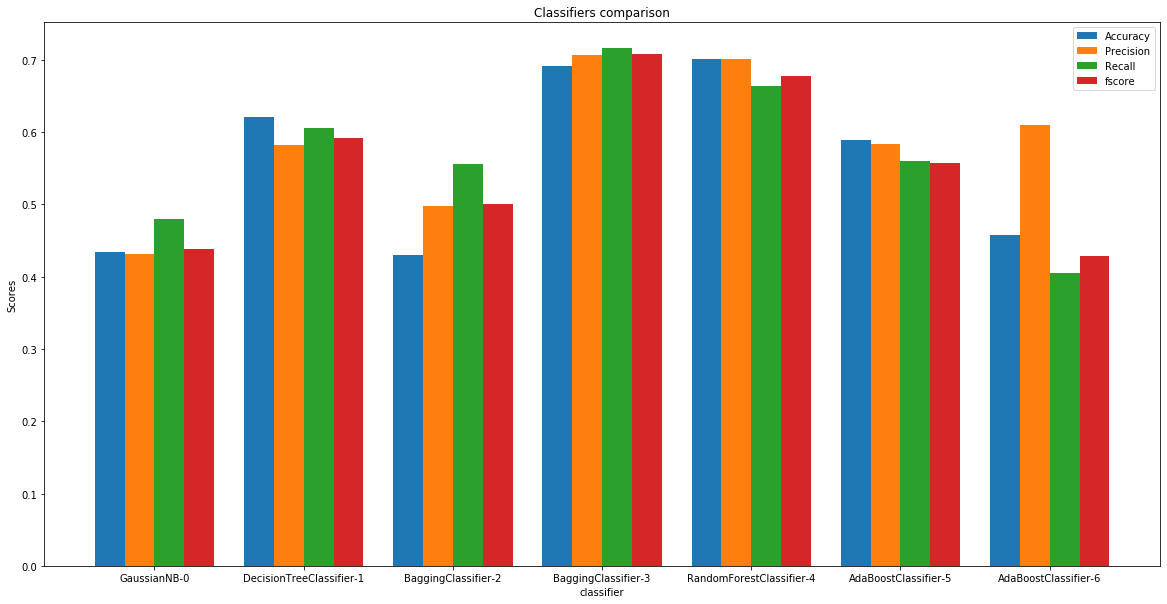

,accuracy,precision,recall,fscore,cm
classifier,,,,,
GaussianNB-0,0.434579,0.431278,0.480511,0.438462,"[[45, 9, 0, 0, 1, 15], [41, 11, 6, 1, 3, 14], ..."
DecisionTreeClassifier-1,0.621495,0.581647,0.605872,0.591707,"[[46, 16, 0, 2, 2, 4], [17, 43, 4, 3, 4, 5], [..."
BaggingClassifier-2,0.429907,0.498167,0.555749,0.500492,"[[31, 13, 0, 0, 1, 25], [30, 14, 6, 0, 3, 23],..."
BaggingClassifier-3,0.691589,0.706243,0.716336,0.707467,"[[49, 17, 0, 2, 0, 2], [18, 48, 5, 1, 1, 3], [..."
RandomForestClassifier-4,0.700935,0.701881,0.663288,0.677155,"[[52, 16, 0, 0, 0, 2], [14, 53, 4, 0, 2, 3], [..."
AdaBoostClassifier-5,0.588785,0.583816,0.560223,0.558014,"[[50, 16, 0, 1, 0, 3], [30, 37, 8, 0, 1, 0], [..."
AdaBoostClassifier-6,0.457944,0.609704,0.405524,0.428548,"[[39, 20, 0, 0, 0, 11], [23, 38, 0, 2, 1, 12],..."


In [46]:
ax, df = test_classifiers(X, y, classes,
                          [GaussianNB(), DecisionTreeClassifier(),
                           BaggingClassifier(GaussianNB()),
                           BaggingClassifier(),
                           RandomForestClassifier(),
                           AdaBoostClassifier(GaussianNB()),
                           AdaBoostClassifier()])
plt.show()
df

# ZADANIE PODSUMOWUJĄCE

Przygotuj funkcję do porównywania klasyfikatorów.

1. Utwórz funkcję `cross_val(classifier, kfold, X, y, standardize=True)` do kroswalidacji danego klasyfikatora. Niech przyjmuje jako parametr klasyfikator, metodę kroswalidacji, zbiór danych, flagę dot. standaryzacji. Następnie, w pętli (jak to robiliśmy wcześniej), niech tworzy klasyfikator, dokonuje podziału na zbiór treningowy i testowy, przeprowadza ewentualną standaryzację. Możesz utworzyć sam taką funkcję lub zastosować metodę [`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate). Dla ułatwienia, przeprowadź standaryzację całego zbioru na raz.

1. Utwórz funkcję `test_classifiers(classifiers, kfold, X, y, standardize=True)` do testowania listy klasyfikatorów. Wykorzystując metodę `cross_val` utwórz w niej pandasowy DataFrame, który w poszczególnych kolumnach zawierać będzie miary poprawności klasyfikacji, natomiast wiersze zawierać będą nazwy klasyfikatorów (wykorzystaj atrybut `.__class__.__name__`, dodatkowo uwzględniając UID klasyfikatora.

1. Utwórz funkcję `plot_results(result_df, title='Classifiers comparison')` która wyświetli wyniki używając wykresu słupkowego. Wykorzystaj dowolną biblioteka wizualizacji.

In [13]:
import numpy as np

from datasets import read_dataset, calculate_metrics, print_results, plot_cm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

def cross_val(classifier, kfold, X, y, standardize=True):
    if standardize:
        X = StandardScaler().fit_transform(X)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']  # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    results = cross_validate(classifier, X, y, scoring=scoring, cv=kfold, n_jobs=-1)
    accuracy = np.average(results['test_accuracy'])
    precision = np.average(results['test_precision_macro'])
    recall = np.average(results['test_recall_macro'])
    f1 = np.average(results['test_f1_macro'])
    return accuracy, precision, recall, f1

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

X, y, classes = read_dataset('glass', 'Type', 'ID')

cross_val(DecisionTreeClassifier(), StratifiedKFold(9), X, y, standardize=True)

(0.5707911733998691,
 0.5269903450459006,
 0.5766460905349794,
 0.5269702519702519)

In [27]:
import pandas as pd

def test_classifiers(classifiers, kfold, X, y, standardize=True):
    results = {}
    for index, clf in enumerate(classifiers):
        accuracy, precision, recall, f1 = cross_val(clf, kfold, X, y, standardize)
        results[f'{clf.__class__.__name__}-{index+1}'] = [accuracy, precision, recall, f1]
    df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy', 'precision', 'recall', 'f1'])
    return df

In [26]:
# wersja z defaultdict
from collections import defaultdict

def test_classifiers_dd(classifiers, kfold, X, y, standardize=True):
    results = {}
    identifiers = defaultdict(int)
    for index, clf in enumerate(classifiers):
        accuracy, precision, recall, f1 = cross_val(clf, kfold, X, y, standardize)
        identifiers[clf.__class__.__name__] += 1
        results[f'{clf.__class__.__name__}-{identifiers[clf.__class__.__name__]}'] = [accuracy, precision, recall, f1]
    df = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy', 'precision', 'recall', 'f1'])
    return df

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

test_classifiers([DecisionTreeClassifier(), DecisionTreeClassifier(), GaussianNB(), GaussianNB()], StratifiedKFold(9),
                 X, y)

,accuracy,precision,recall,f1
DecisionTreeClassifier-1,0.569774,0.544258,0.572384,0.534131
DecisionTreeClassifier-2,0.609516,0.536931,0.556842,0.528574
GaussianNB-3,0.441770,0.417240,0.509553,0.440335
GaussianNB-4,0.441770,0.417240,0.509553,0.440335


In [50]:
test_classifiers_dd([DecisionTreeClassifier(), DecisionTreeClassifier(), GaussianNB(), GaussianNB()], StratifiedKFold(9),
                    X, y)

,accuracy,precision,recall,f1
DecisionTreeClassifier-1,0.599200,0.554399,0.603799,0.550874
DecisionTreeClassifier-2,0.572805,0.522728,0.583407,0.519509
GaussianNB-1,0.441770,0.417240,0.509553,0.440335
GaussianNB-2,0.441770,0.417240,0.509553,0.440335


In [48]:
import seaborn as sns

def plot_results(result_df, title='Classifiers comparison'):
    melted_df = pd.melt(result_df.reset_index(), id_vars='index', var_name='metric')
    g = sns.barplot(x='index', y='value', hue='metric', data=melted_df)
    g.set_title(title)
    g.tick_params('x', rotation=90)
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return g

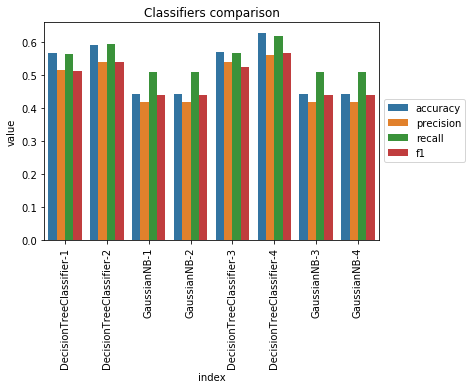

In [51]:
df = test_classifiers_dd([DecisionTreeClassifier(), DecisionTreeClassifier(), GaussianNB(), GaussianNB(), DecisionTreeClassifier(), DecisionTreeClassifier(), GaussianNB(), GaussianNB()], StratifiedKFold(9),
                     X, y)
plot_results(df)